# Assignment 2 - Logistic Regression
> **FULL MARKS = 10**

In this assignment, you are going to implement your own logistic Regression function. Please notice **no** library versions of logistic regression are allowed. Follow the instructions, you will need to fill the blanks to make it functional. The process is similar to the previous assignment. 

***Initialization***

*No more library allowed*

In [63]:
# load required library
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import scipy.optimize as opt

Load data *(Do not modify)*
_________

We use 100 samples and 2 features. 


In [64]:
x, y = load_iris(return_X_y=True)

In [65]:
x=x[:100, :2] # class 0 and 1 balanced
y=y[:100]

**Visualize data**
___________

In [66]:
# draw raw data
def draw_data(x,y):
    
    #########################################################################
    # Full Mark: 1                                                          #    
    # TODO:                                                                 #
    # 1. make a scatter plot of the raw data                                #
    # 2. set title for the plot                                             #
    # 3. set label for x,y axis                                             #
    # Note, this scatter plot has two different type of points              #
    #########################################################################

    colors = iter(['r', 'g', 'b', 'c', 'm', 'y', 'k'])
    # split into classes so can have label
    for clas in np.unique(y):
        # plot points with class
        plt.scatter(x[np.where(y == clas),0], x[np.where(y == clas),1], c = next(colors), label = f'Class {clas}')
    
    plt.xlabel("Length")
    plt.ylabel("Width")
    plt.title("Iris Dataset")
    plt.legend()

    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    # show plot
    plt.show()

Your plot should be similar to the example below

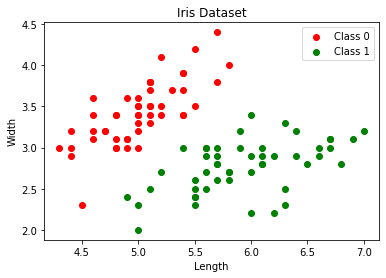

In [67]:
draw_data(x,y)

**Sigmoid function**
________________

In [68]:
# please do not modify this cell
x = np.concatenate((np.array([np.ones(len(y))]).T, x), axis=1)
theta = np.zeros(x.shape[1])

**You can decide by yourselves whether to split the dataset to training and testing. The training and testing datasets spliting is not a part of the assignment 2 as you have done that in assignmnet 1. Without spliting, you can just report the accuracy on training dataset. **

In [69]:
# define sigmoid function
# math: refer to https://en.wikipedia.org/wiki/Sigmoid_function or slides
def sigmoid(theta, X):
    #########################################################################
    # Full Mark: 1                                                          # 
    # TODO:                                                                 #
    # 1. implement the sigmoid function over input theta and X
    #########################################################################
    
    # 1/(1+e^-x)
    s = 1 / (1 + np.exp(-(np.dot(X, theta))))

    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    
    return s

**Cost function**
____________

In [70]:
# define cost function with sigmoid function
def cost(theta, X, y):
    #########################################################################
    # Full Mark: 2                                                          # 
    # TODO:                                                                 #
    # 1. implement the cross entropy loss function with sigmoid             #
    #########################################################################

    p = sigmoid(theta.T, X)
    # -1/m sum(ylog(y^)) -> -1/m (ylog(y^) + (1-y)log(1-y^))
    co = np.sum((-y * np.log(p)) - ((1 - y) * np.log(1 - p))) / (len(X))

    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return co

**Calculate gradients**
________________

In [71]:
# the gradient of the cost is a vector of the same length as θ where the jth element (for j = 0, 1, . . . , n)
def gradient(theta, X, y):
    #########################################################################
    # Full Mark: 2                                                          # 
    # TODO:                                                                 #
    # 1. calculate the gradients using theta and sigmoid                    #
    # Hint: X may need to be transposed to do matrix operation              #
    #########################################################################
    
    p = sigmoid(theta.T, X)
    # dsigmoid(x)/dx = sigmoid(x)(1 - sigmoid(x))
    # grad = ... = 1/m X^t[p - y]
    grad = (1 / X.shape[0]) * np.dot(X.T, (p - y))
    #print(grad)

    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return grad

**Predicting**
________________

In [72]:
# predict for new X
def predict(theta, X):
    #########################################################################
    # Full Mark: 1                                                          # 
    # TODO:                                                                 #
    # 1. predict the value using theta and sigmoid                          #
    # 2. convert the predicted value to 0/1                                 #
    # That's how it is called Logistic regression                           #
    #########################################################################
    
    p = sigmoid(theta.T, X)
    #print(p)
    predict_labels = [1 if x >= 0.5 else 0 for x in p]
    #print(predict_labels)
    
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    return predict_labels

**Calculate accuracy**
________________

In [73]:
# calculate accuracy
def accurate(predictions, y):
    #########################################################################
    # Full Mark: 1                                                          # 
    # TODO:                                                                 #
    # 1. calculate the accuracy value                                       #
    # Note that you coud not import extra library                           #
    #########################################################################
    
    err = np.array(predictions) - y # 1 and 0s so can just do this
    accuracy_score = 1 - np.mean(err)
    #print(accuracy_score)
    
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return accuracy_score

**Calling functions**
________

In [74]:
# please do not modify this cell
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(x, y))
final_theta = result[0]
final_cost = cost(final_theta, x, y)
predictions = predict(final_theta, x)
accuracy = accurate(predictions, y)
print("final cost is " + str(final_cost))
print("accuracy is " + str(accuracy))

final cost is 0.05171662372341682
accuracy is 0.99


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


**Decsion boudary** 

In [75]:
# draw decision boudary
def draw_decision_boudary(final_theta,x,y):
    #########################################################################
    # Full Mark: 2                                                          # 
    # TODO:                                                                 #
    # 1. plot the decision boudary on the raw data                          #
    # 2. set title for the plot                                             #
    # 3. set label for x,y axis                                             #
    # Note, this scatter plot has two different type of points              #
    #########################################################################
    
    #print(final_theta)
    colors = iter(['r', 'g', 'b', 'c', 'm', 'y', 'k'])
    # split into classes so can have label
    for clas in np.unique(y):
        # plot points with class
        plt.scatter(x[np.where(y == clas),1], x[np.where(y == clas),2], c = next(colors), label = f'Class {clas}') # x has bias now [1, x, y]
    # add decision boundary -> 0 = final_theta[0] + final_theta[1]x + final_theta[2]y
    # y = -(final_theta[0] + final_theta[1]x) / final_theta[2]
    x_p = np.linspace(4, 8, 1000)
    y_p = lambda x_p: -(final_theta[0] + final_theta[1] * x_p) / final_theta[2]
    plt.plot(x_p, y_p(x_p))
    plt.xlabel("Length")
    plt.ylabel("Width")
    plt.title("Iris Dataset")
    plt.legend()

    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    # show plot
    plt.show()

Your plot should be similar to the example below

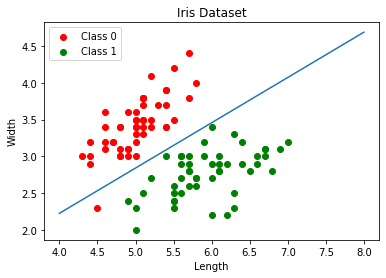

In [76]:
draw_decision_boudary(final_theta,x,y)